# **Data Cleaning, Schema Checks & Project Plan (Insurance Dataset)**

## Introduction

In this notebook, we are not trying to build the best machine learning model. Instead, our goal is to create a solid starting point for any data project by cleaning the data properly, checking that everything looks correct (called schema validation), and planning the project using a Kanban board.

We'll use the `insurance.csv` dataset, which has details about people like age, gender, BMI, region, smoking habits, and their medical charges. Before jumping into prediction or modeling, we need to make sure our data is clean, correct, and ready to use.

---

## Problem Statement

Real-life data usually has issues — it might be messy, have missing values, wrong types, or duplicate rows. If we use it directly for machine learning, the results won't be reliable.

So, this project focuses on doing the basic but most important part:

* Loading the data properly
* Cleaning it using a reusable function
* Making sure the column names and data types are correct
* Planning our work clearly using a Kanban board

---

## Objective

* Use a reusable `clean_data()` function to clean the dataset
* Change category columns like `sex` and `region` into number form (if needed)
* Check if all required columns are present and have the correct data type
* Make a simple project plan using a Kanban board
* Keep everything reusable and well-organized for future use

---

## Dataset Description

The dataset we are using is `insurance.csv`. It has information about different people and how much they paid for insurance.

**Columns:**

* `age`: Age
* `sex`: Male or Female
* `bmi`: Body Mass Index
* `children`: Number of children
* `smoker`: Yes or No
* `region`: Area where they live
* `charges`: Total insurance charges (target column)

Some of these columns are categorical (like `sex`, `smoker`, and `region`) and will need to be changed to numbers later on.

---


In [ ]:
import pandas as pd
import numpy as np
from all_model import *
from sklearn.model_selection import train_test_split



## Data Cleaning Steps

### Step 1: Data Loading & Cleaning

We use a `clean_data()` function from our own module `cleaning_module.py`. It does the following:

* Removes duplicates
* Deals with missing values (either drops them or fills them)
* Saves the cleaned data
* Gives us back the cleaned DataFrame

### Step 2: Schema Check

We manually check that:

* All needed columns exist
* Each column has the correct data type
* No important column is missing values

This helps catch any data issues early.

Example checks:

* `age` should be a number (int)
* `bmi` should be a decimal (float)
* `charges` should not have missing values

### Step 3: Convert Categorical Columns

After cleaning, we manually convert category columns into numbers using `pd.get_dummies()`.

* `sex`, `smoker`, and `region` become numeric columns
* Boolean columns are also converted to integers
* We define the final list of features we’ll use


In [10]:


# Function to load data from a CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return df
    except Exception as e:
        print("Error loading data:", e)
        return None

# Function to remove duplicate rows
def drop_duplicates(df):
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    print("Duplicates removed:", before - after)
    return df

# Function to handle missing values
def handle_missing(df, method='drop'):
    if method == 'drop':
        df = df.dropna()
        print("Missing values dropped.")
    elif method == 'fill_zero':
        df = df.fillna(0)
        print("Missing values filled with 0.")
    elif method == 'fill_mean':
        df = df.fillna(df.mean(numeric_only=True))
        print("Missing values filled with mean.")
    else:
        print("Invalid method. No missing value handling applied.")
    return df

# Function to save the cleaned data
def save_cleaned_data(df, output_path='cleaned_data.csv'):
    df.to_csv(output_path, index=False)
    print("Cleaned data saved to", output_path)

# Main cleaning pipeline function
def clean_data(file_path, save_path='cleaned_data.csv', method='drop'):
    df = load_data(file_path)
    if df is not None:
        df = drop_duplicates(df)
        df = handle_missing(df, method=method)
        save_cleaned_data(df, save_path)
        print(df.isna().sum())  # just after clean_data()

        return df

## Insurance Dataset Overview

We now take a quick look at the `insurance.csv` dataset after applying the `clean_data()` function. We explore its structure, check for missing values, and validate data types against the expected schema.


### Summary:

- No missing values found in the dataset after cleaning
- All columns match the expected schema
- Dataset is ready for encoding and model training


In [13]:

# Clean the data using your cleaning modul
insurance_raw = "insurance.csv"
insurance = clean_data(insurance_raw) 


# Check dataset shape
print("Shape:", insurance.shape)

# Dataset Preview
print("\nPreview:")
display(insurance.head())

# Column Info
print("\nColumn Info:")
print(insurance.info())

# Summary Statistics
print("\nSummary Statistics:")
display(insurance.describe())

# Missing Values
print("\nMissing Values:")
print(insurance.isnull().sum())

#changing qualitative predictor to quantitative predictor
insurance = pd.get_dummies(insurance, columns= ['sex' , 'smoker', 'region' ], drop_first=True) 
bool_col = insurance.select_dtypes(include = 'bool').columns
insurance[bool_col] = insurance[bool_col].astype(int)


selected_features = ['age', 'smoker_yes', 'bmi', 'region_southeast' , 'children' , 'sex_male' , 'region_northwest' , 'region_southwest' ]
X = insurance[selected_features].values
y = insurance['charges'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Data loaded successfully.
Duplicates removed: 1
Missing values dropped.
Cleaned data saved to cleaned_data.csv
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Shape: (1337, 7)

Preview:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Column Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None

Summary Statistics:


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010



Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## **Connecting with Probabilistic Theory — PML1 §2.2**

To better understand what our regression models are doing under the hood, we now look at things from a probability perspective, based on what we studied in PML1 (Section 2.2).

### **Representing Regression as a Probabilistic Model**

Let’s say `X` is our input data (features) and `Y` is the output (like insurance charges). We treat both as random variables.

We assume the data follows a linear relationship:

**Y = Xβ + ε**

Where:
- **β** is a vector of unknown parameters (weights)
- **ε** is the error or noise term

Now, we assume this noise is normally distributed:

**ε ~ N(0, σ²)**

This tells us that the errors have zero mean and constant variance. This assumption is crucial when we later try to make confidence intervals or test hypotheses.



### **Why We Use Mean Squared Error (MSE)****

The core goal of a regression model is to minimize the average squared error between predicted and actual values:

**E[(Y - Xβ)²]**

This is exactly the Mean Squared Error (MSE). So when we compute **Test MSE**, we’re actually estimating the expected error variance of our model.


### **Expected Value Interpretation****

The model tries to predict the average (expected) value of Y given X. That is:

**E[Y | X] = Xβ**

This is the conditional mean — and it’s what the model aims to learn.



### **i.i.d. Assumption and Generalization**

One more key assumption: we assume each data point in the dataset is **independent and identically distributed (i.i.d.)**.

Why does this matter?

Because it lets us apply the **Central Limit Theorem (CLT)** — which means the sample mean will be normally distributed as the sample size grows. That’s why we can rely on metrics like Test MSE or Adjusted R² — they become meaningful averages of model performance.



### **Wrapping It Up**

By seeing regression through the lens of probability:
- We understand that predictions are actually expectations.
- Error becomes a distribution — not just a number.
- Assumptions (like Gaussian noise or i.i.d. samples) help justify why our model evaluation is statistically sound.

This theory builds the confidence that we’re not just fitting curves, but modeling uncertainty, structure, and generalization — all backed by probability.

---


## **Basic Model Prediction Results on cleaned dataset (Using all\_model.py)**

Although this week's main focus is cleaning and planning, we also ran several regression models using our custom `all_model.py` file to test the cleaned dataset.

Here’s a summary of model performance using metrics that are available across all models:

| Model             | Train MSE   | Test MSE    | Train R² | Test R² | Adjusted R² |
| ----------------- | ----------- | ----------- | -------- | ------- | ----------- |
| Linear Regression | 6106.86     | 6058.95     | 0.7299   | 0.8069  | 0.7299          |
| Ridge Regression  | 36992860.47 | 35899651.41 | 0.7298   | 0.8046  | 0.7278      |
| Lasso Regression  | 37098338.25 | 36419763.10 | 0.7290   | 0.8018  | 0.7270      |
| Regression Tree   | 43870165.27 | 48514402.99 | 0.6796   | 0.7360  | 0.6772      |
| Random Forest     | 34781041.10 | 33914211.83 | 0.7460   | 0.8154  | 0.7440      |
| Gradient Boosting | 16138131.51 | 19747903.18 | 0.8821   | 0.8925  | 0.8812      |

Gradient Boosting gave the best results, followed by Random Forest and Lasso. This shows that the cleaned data is well-structured and ready for accurate modeling.

---



 Multiple Linear Regression

--- Train Evaluation ---


Residual Standard Error (RSE): 6106.868334572685
R-squared: 0.7299057809339075
Correlation between actual and predicted: 0.85434523521461
R-squared vs. Correlation squared: 0.7299057809339075 vs 0.7299057809339073
H1: F-statistic = 358.06955183323265 → likely significant.

--- Test Evaluation ---
Residual Standard Error (RSE): 6058.947734426037
R-squared: 0.8069287081198009
Correlation between actual and predicted: 0.9064671043724966
R-squared vs. Correlation squared: 0.8069287081198009 vs 0.8216826113094585


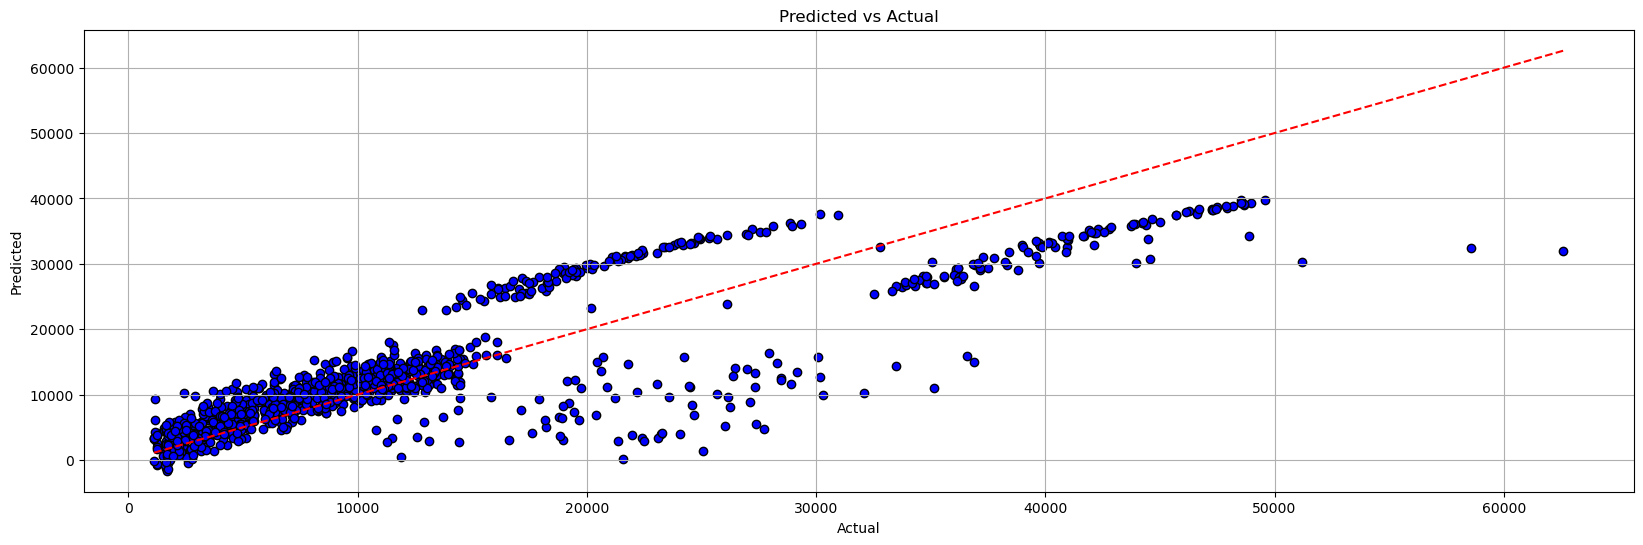

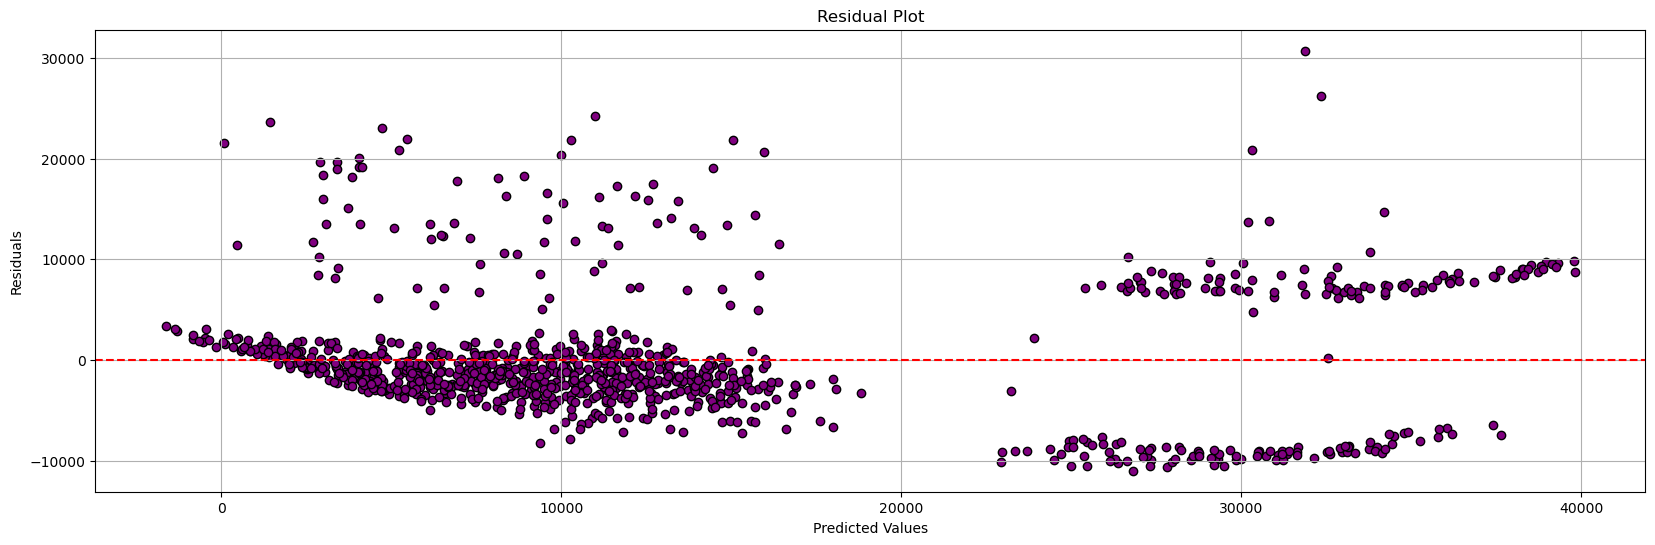

Ridge Regression
The best lambda is : 11.9680
Final training MSE is : 36992860.4698

Train R^2 : 0.7298
Train MSE : 36992860.4698
Adjusted R^2 is : 0.7278
AIC is : 18644.6457
BIC is : 18684.4416
 Test R2: 0.8046
 Test MSE: 35899651.4140


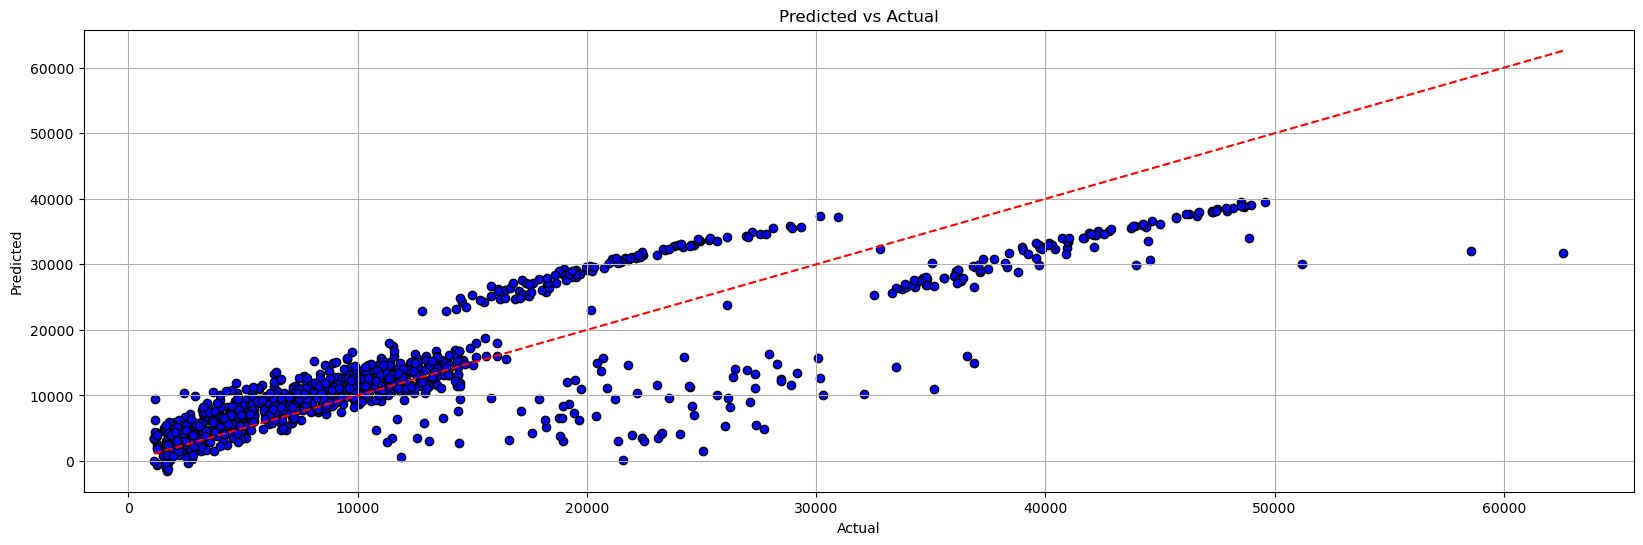

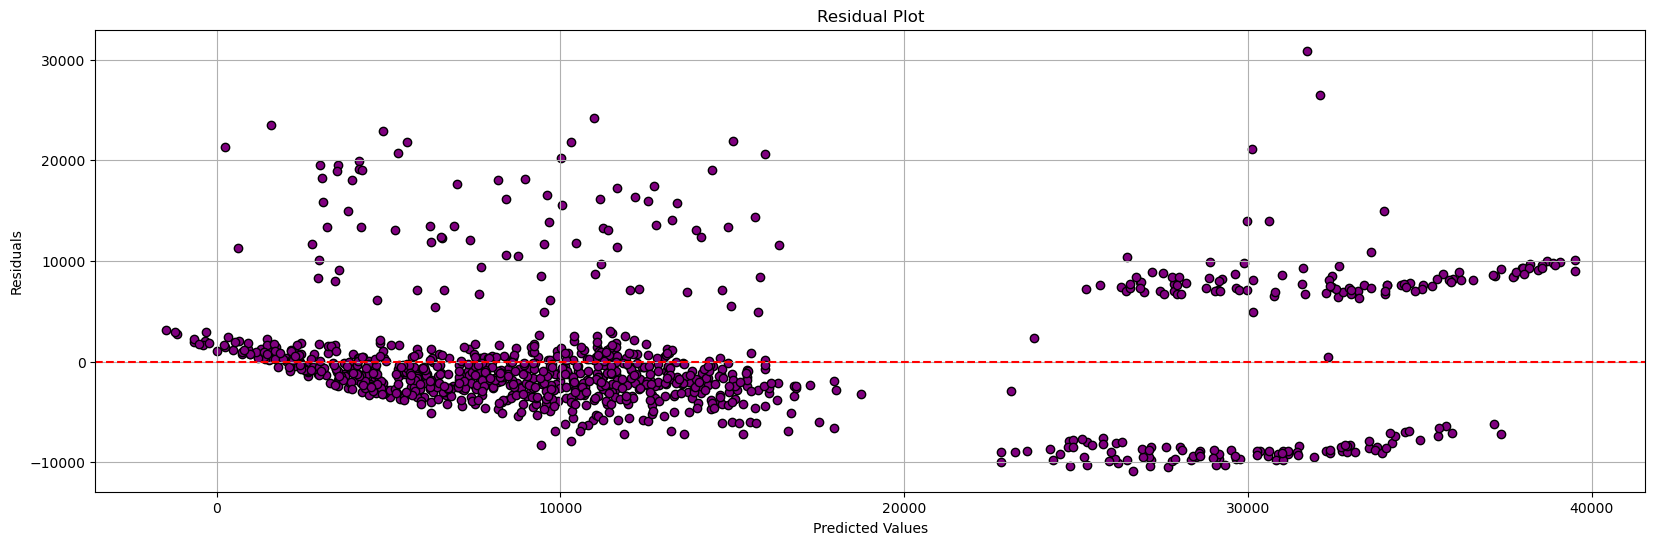

Lasso Regression
Best Lambda Value: 110.9752

Lasso Results:
Train RSS: 39658123591.04
Test RSS: 9760496510.85
Estimated Variance σ²: 37413324.14
Mallow's Cp: 37658313.17
AIC: 37658313.17
BIC: 39051104.88
Train MSE: 37098338.25
Test MSE: 36419763.10
RMSE: 6090.84
R² train: 0.7290
R² test: 0.8018
Adjusted R²: 0.7270


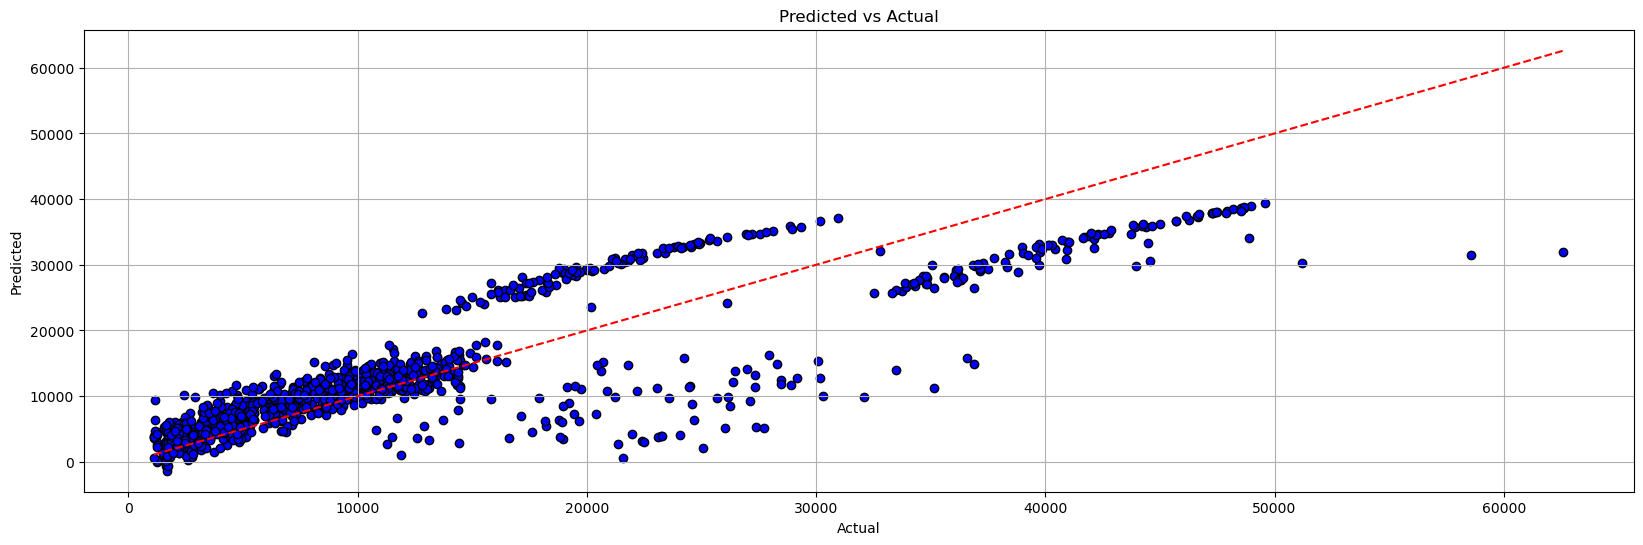

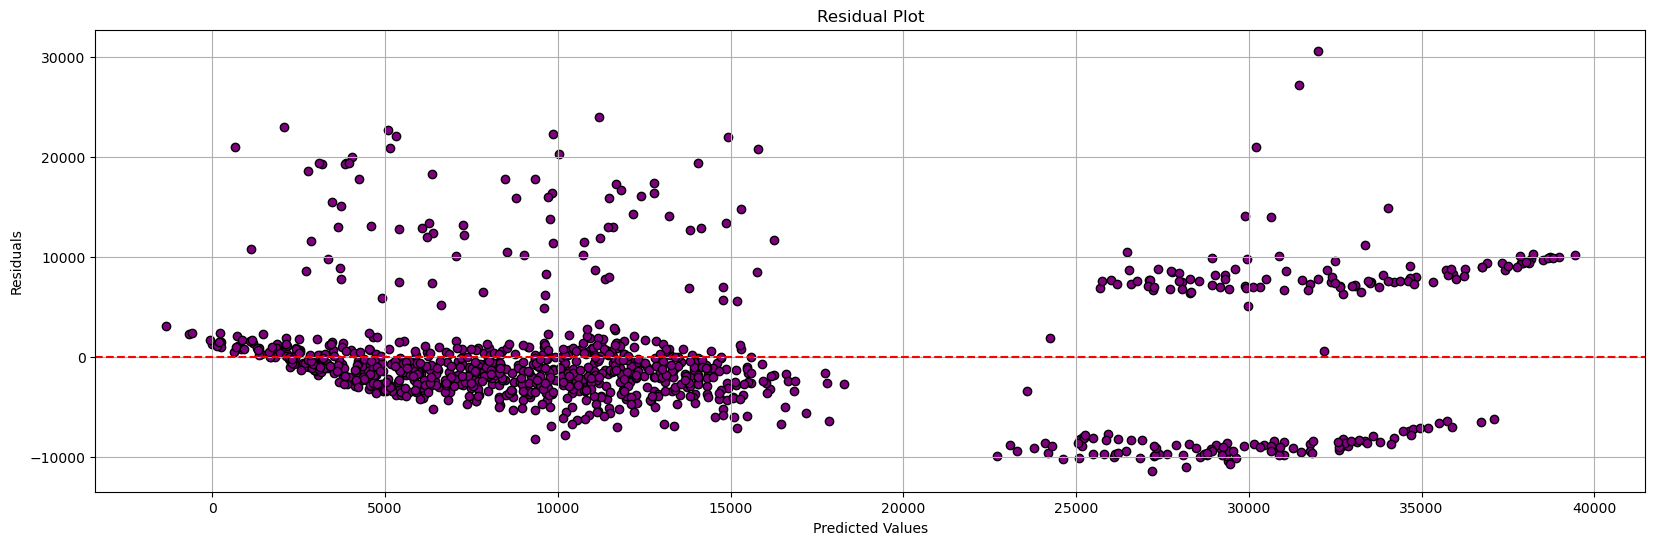

Regression Tree

Final Model Evaluation Report
───────────────────────────────────
Best Alpha    : 0.0000
Train MSE     : 43870165.2686
Test MSE      : 48514402.9946
Train R² Score: 0.6796
Test R² Score : 0.7360
 Adjusted R^2 : 0.6772


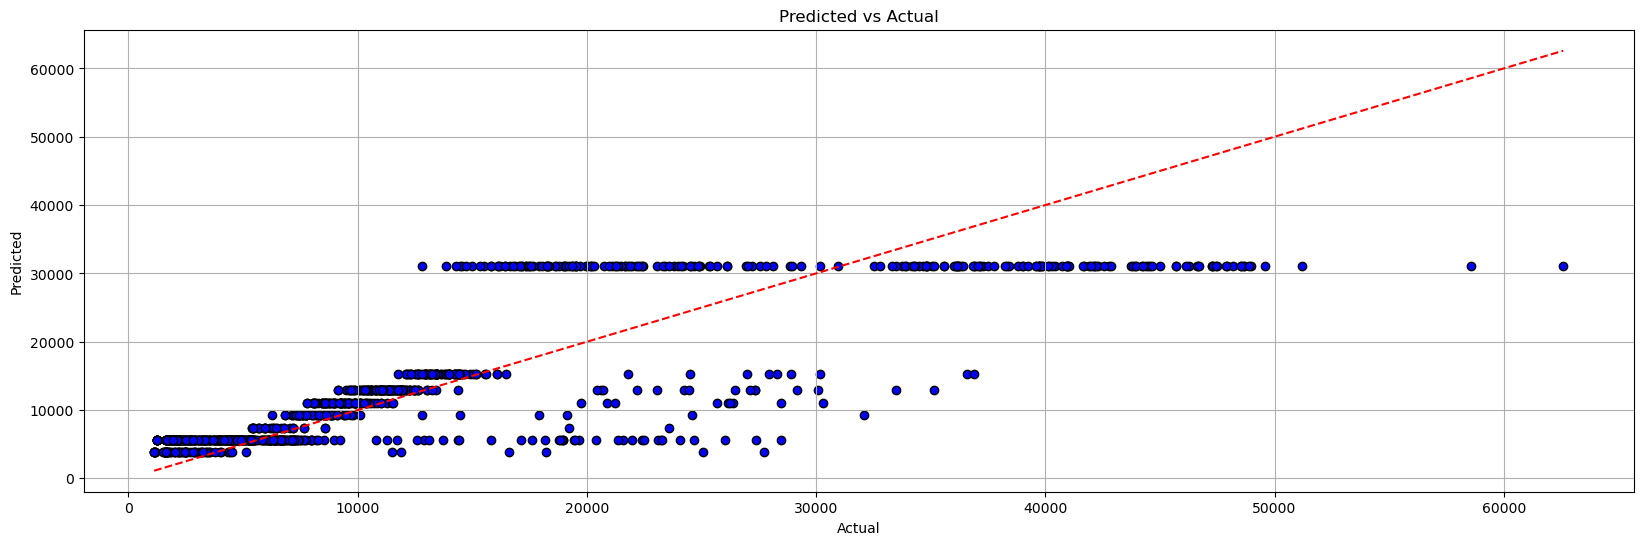

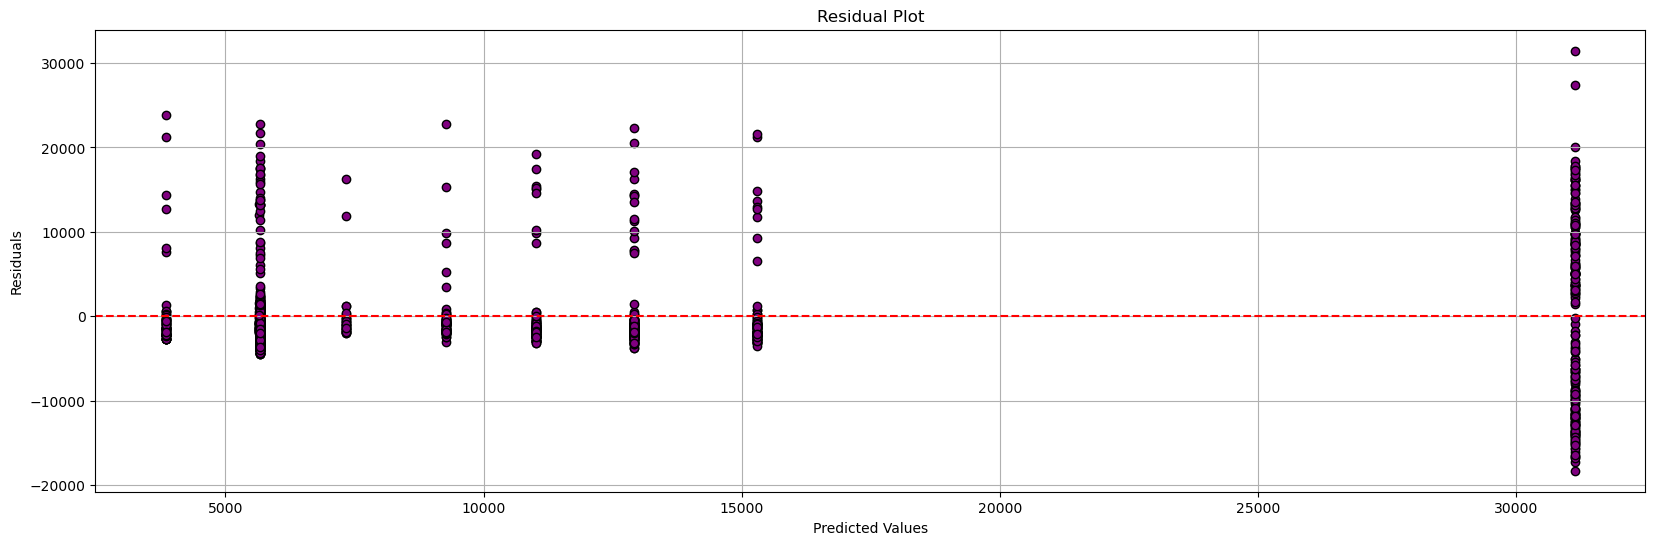

Random forest
Final Train MSE: 34781041.10419968
Final Test MSE: 33914211.83004517
Final Train R²: 0.7459655632684321
Final Test R²: 0.8154389515958513
 Adjusted R^2 : 0.7440483222364958


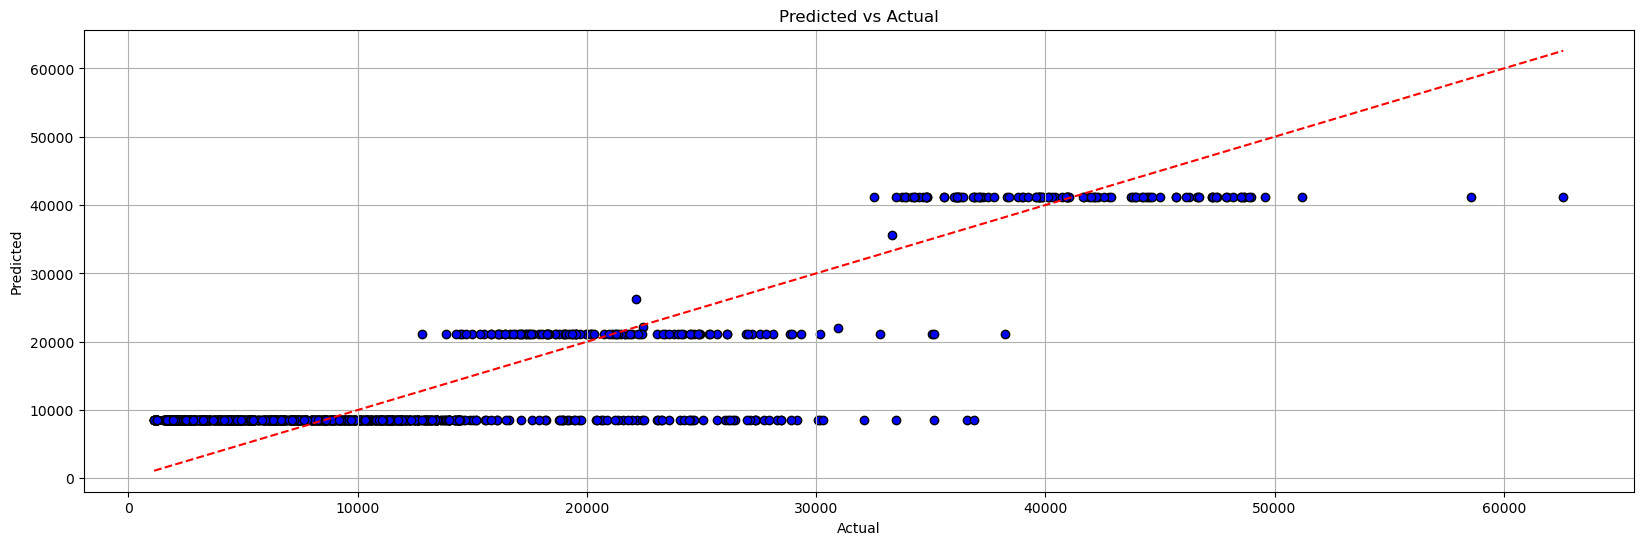

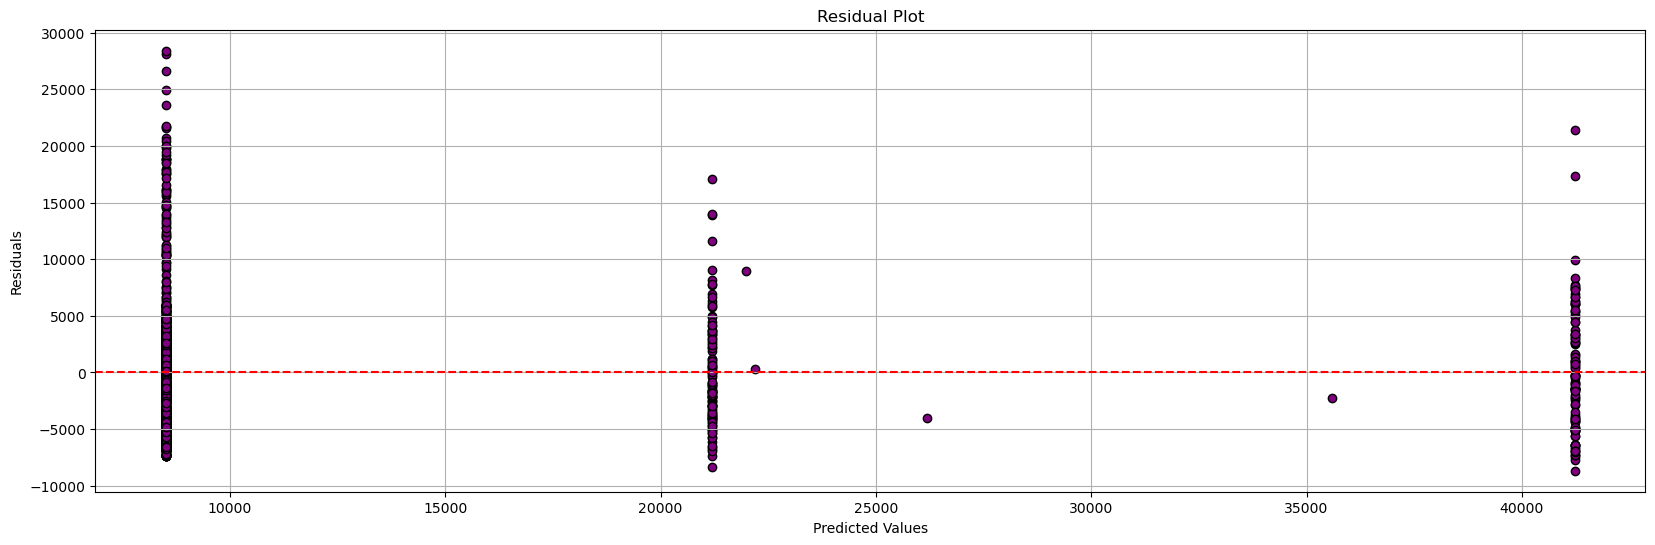

Gradient Boosting
 Final Train MSE: 16138131.5136254
 Final Test MSE: 19747903.180230197
 Final Train R²: 0.8821300047723765
 Final Test R²: 0.8925319646821923
 Adjusted R^2 : 0.881240419902734


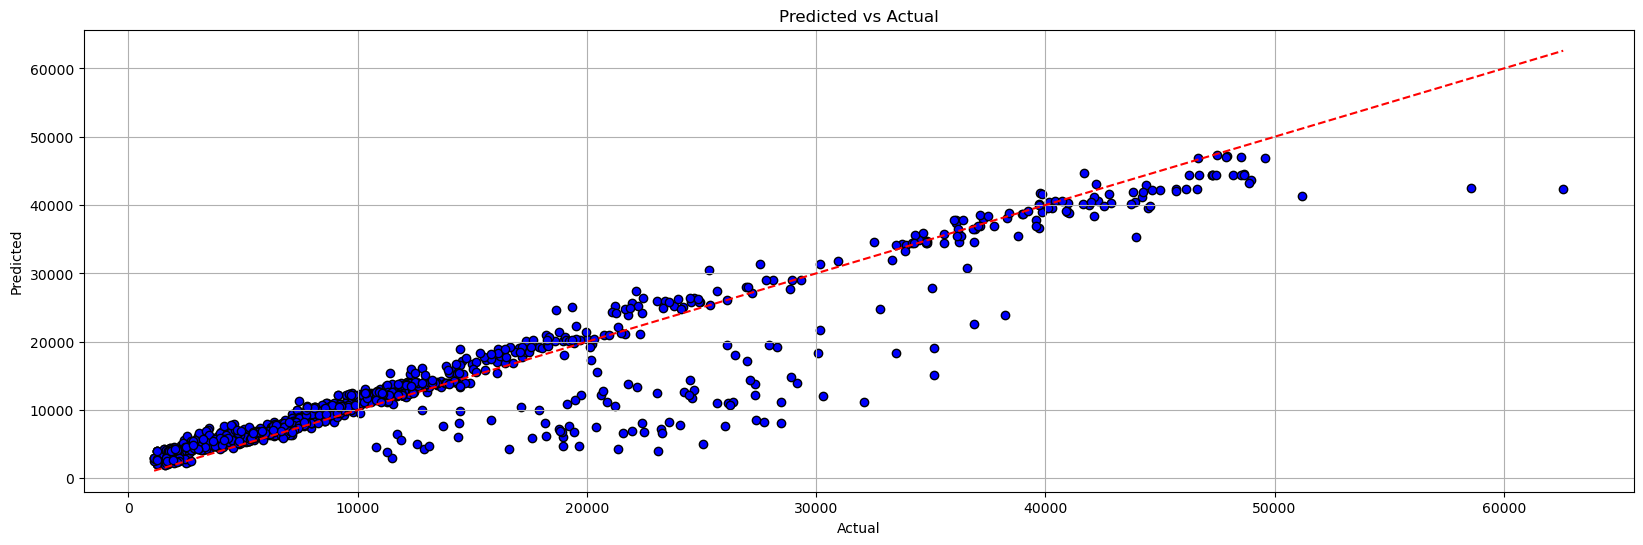

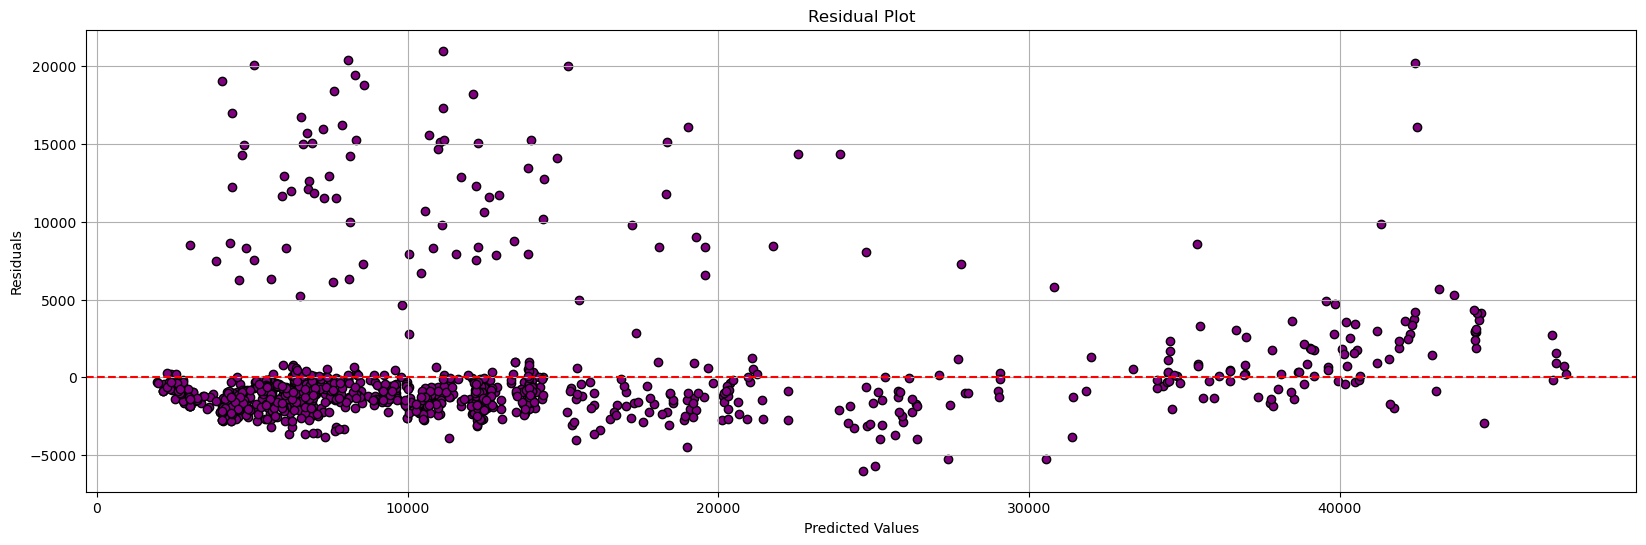

In [12]:

print("=======================================================")
print(" Multiple Linear Regression")
_ = run_multiple_linear_regression(X_train, y_train, X_test, y_test, feature_names=selected_features)

print("=======================================================")
print('Ridge Regression')
lembda_range = np.linspace(0, 100, 9000)
_ = ridge_model(insurance, X_train, y_train, X_test, y_test, lembda_range)

print("=======================================================")
print('Lasso Regression')
_ = lasso(X, y, lambda_values=np.logspace(-2, 3, 200))


print("=======================================================")
print("Regression Tree")
_ = tree_model(X, y)

print("=======================================================")
print('Random forest')
x_rf = insurance[selected_features]
_ = random_forest(x_rf, y, B=100)

print("=======================================================")
print("Gradient Boosting")
_ = boosting(X_train, y_train, X_test, y_test, n_estimators=500, learning_rate=0.01)



---

## Kanban Board (Week 5 Plan: PR #1)

| Task                        | Description                                    | Status      |
| --------------------------- | ---------------------------------------------- | ----------- |
| Set up folder & file layout | Arrange code, notebook, modules                | Done        |
| Create cleaning module      | Make `cleaning_module.py` for reuse            | Done        |
| Handle missing values       | Use drop or fill methods                       | Done        |
| Convert category to numeric | Use `pd.get_dummies()` for categorical columns | Done        |
| Add schema checks           | Confirm column names and data types            | To Do       |
| Write main notebook         | Document everything step-by-step               | In Progress |
| Show Kanban tasks in table  | List out tasks and progress in table format    | Done        |

---

## Final Output

At the end of this week’s work:

* We have a cleaned and ready version of the insurance data
* All steps are written using functions so we can reuse them
* We have a clear project plan (Kanban) showing what’s done and what’s left
* We even tested model performance to confirm the quality of preprocessing

This notebook is now a strong base to start modeling or any further analysis in the next steps.

---

## Conclusion

This week’s focus was not on building prediction models but on making sure our data is clean, complete, and correct. We created a reusable cleaning function, did schema checks, and planned everything using a Kanban board.

As a bonus, we also ran regression models to confirm that our preprocessing steps were effective. Gradient Boosting gave the best results, proving our pipeline is reliable.

To go deeper, we also connected our work with the theoretical foundation from **PML1 §2.2**, which explains regression in terms of probability theory. We saw how our models aim to estimate the expected value of the target variable given input features, and how assumptions like normally distributed errors and i.i.d. samples allow us to make meaningful inferences from our data.

These steps are very important before doing any modeling because clean data means better results. With this setup, we’re ready for the next stage in our machine learning project.


---------------------------------------------------------------------------------------------------------------------------------